# Hierarchical Clustering and T-sne

### This project is to understand the implementation of hierarchical clustering and T-sne. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Read the dataset

In [2]:
stocks = pd.read_csv("company-stock.csv")
stocks.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [3]:
## Shape of our dataset 

stocks.shape

(60, 964)

We have 60 Stocks and 964 Columns

Let us Perfrom subsetting in stock datafile using .iloc function at ([:,1:]) and store it in a variable : movements. 

In [4]:
movements = stocks.iloc[:,1:] ## All rows, columns starting from 1 till end
movements = movements.values
print(movements)

[[ 5.8000000e-01 -2.2000500e-01 -3.4099980e+00 ... -5.3599620e+00
   8.4001900e-01 -1.9589981e+01]
 [-6.4000200e-01 -6.5000000e-01 -2.1000100e-01 ... -4.0001000e-02
  -4.0000200e-01  6.6000000e-01]
 [-2.3500060e+00  1.2600090e+00 -2.3500060e+00 ...  4.7900090e+00
  -1.7600090e+00  3.7400210e+00]
 ...
 [ 4.3000100e-01  2.2999600e-01  5.7000000e-01 ... -2.6000200e-01
   4.0000100e-01  4.8000300e-01]
 [ 9.0000000e-02  1.0000000e-02 -8.0000000e-02 ... -3.0000000e-02
   2.0000000e-02 -3.0000000e-02]
 [ 1.5999900e-01  1.0001000e-02  0.0000000e+00 ... -6.0001000e-02
   2.5999800e-01  9.9998000e-02]]


### Clustering stocks using KMeans

Step 1 : Import Normalizer. 

In [5]:
from sklearn.preprocessing import Normalizer

Step 2 :Create a normalizer: normalizer

In [6]:
normalizer = Normalizer()

Create a KMeans model with 10 clusters: kmeans

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)

Make a pipeline chaining normalizer and kmeans: pipeline.

In [8]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(normalizer,kmeans)

 Fit pipeline to the daily price movements

In [9]:
pipeline.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

Now Let us  Find out which company stocks move together? 

In [10]:
companies=list(stocks.iloc[:,0])
print(companies)

['Apple', 'AIG', 'Amazon', 'American express', 'Boeing', 'Bank of America', 'British American Tobacco', 'Canon', 'Caterpillar', 'Colgate-Palmolive', 'ConocoPhillips', 'Cisco', 'Chevron', 'DuPont de Nemours', 'Dell', 'Ford', 'General Electrics', 'Google/Alphabet', 'Goldman Sachs', 'GlaxoSmithKline', 'Home Depot', 'Honda', 'HP', 'IBM', 'Intel', 'Johnson & Johnson', 'JPMorgan Chase', 'Kimberly-Clark', 'Coca Cola', 'Lookheed Martin', 'MasterCard', 'McDonalds', '3M', 'Microsoft', 'Mitsubishi', 'Navistar', 'Northrop Grumman', 'Novartis', 'Pepsi', 'Pfizer', 'Procter Gamble', 'Philip Morris', 'Royal Dutch Shell', 'SAP', 'Schlumberger', 'Sony', 'Sanofi-Aventis', 'Symantec', 'Toyota', 'Total', 'Taiwan Semiconductor Manufacturing', 'Texas instruments', 'Unilever', 'Valero Energy', 'Walgreen', 'Wells Fargo', 'Wal-Mart', 'Exxon', 'Xerox', 'Yahoo']


Predict the cluster labels: labels 

In [11]:
labels = pipeline.predict(movements)

 Create a DataFrame aligning labels and companies: df 

In [12]:
df = pd.DataFrame({'labels': labels, 'companies': companies})

Display df sorted by cluster label 

In [13]:
print(df.sort_values('labels'))

    labels                           companies
25       0                   Johnson & Johnson
54       0                            Walgreen
56       0                            Wal-Mart
53       1                       Valero Energy
31       1                           McDonalds
13       1                   DuPont de Nemours
12       1                             Chevron
32       1                                  3M
10       1                      ConocoPhillips
41       1                       Philip Morris
8        1                         Caterpillar
44       1                        Schlumberger
57       1                               Exxon
23       1                                 IBM
26       2                      JPMorgan Chase
5        2                     Bank of America
3        2                    American express
16       2                   General Electrics
17       2                     Google/Alphabet
18       2                       Goldman Sachs
35       2   

### Hierarchies of stocks 

 Import normalize 

In [14]:
from sklearn.preprocessing import normalize 

Normalize the movements: normalized_movements 

In [15]:
normalized_movements = normalize(movements)

Calculate the linkage: mergings

In [16]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(normalized_movements, method='complete')

 Plot the dendrogram  

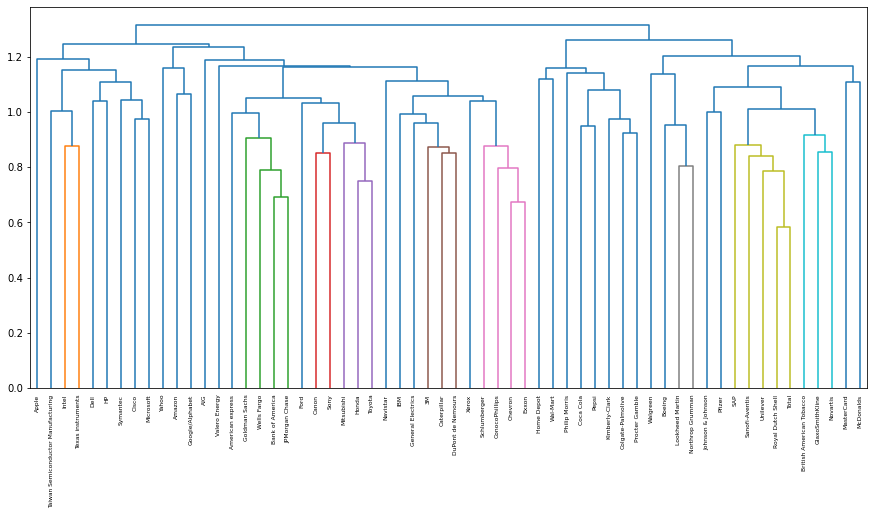

In [17]:


import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,7)

dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=6)
plt.show()

### A T-SNE map of the stock market 

In [18]:
#  Import TSNE 

from sklearn.manifold import TSNE

# Create a TSNE instance: model 

model = TSNE()

#  Apply fit_transform to normalized_movements: tsne_features 

tsne_features = model.fit_transform(normalized_movements)

In [19]:
#  Select the 0th feature: xs 

xs = tsne_features[:,0]

In [20]:
#  Select the 1st feature: ys 

ys = tsne_features[:,1]

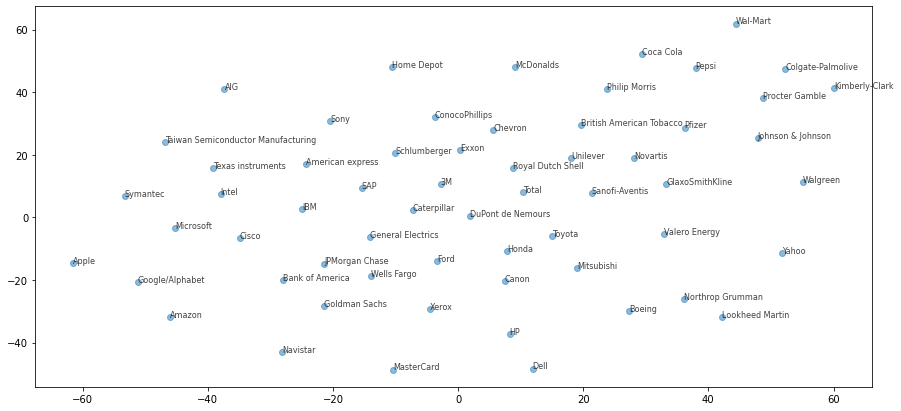

In [21]:
# catter plot both the features (i.e 0th & 1st feature) 
plt.scatter(xs,ys, alpha=0.5)
plt.show

# Annotate the points 
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=8, alpha=0.75)
plt.show()



### Summary :

**In this Project we have succesfully implemented hierarchical clustering and T-sne.** 